In [6]:
import pandas as pd

train_prob = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이콘_lg/train_problem_data.csv', thousands = ',')
train_qual = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이콘_lg/train_quality_data.csv', thousands = ',')
train_err = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이콘_lg/train_err_data.csv', thousands = ',')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
prob_user_id = sorted(train_prob.user_id.unique())

In [9]:
train_err['prob'] = train_err['user_id'].isin(prob_user_id).astype('int64')

In [ ]:
train_err.head()

user_id            time model_nm       fwver  errtype errcode  prob
0    10000  20201101025616  model_3  05.15.2138       15       1     0
1    10000  20201101030309  model_3  05.15.2138       12       1     0
2    10000  20201101030309  model_3  05.15.2138       11       1     0
3    10000  20201101050514  model_3  05.15.2138       16       1     0
4    10000  20201101050515  model_3  05.15.2138        4       0     0

In [7]:
import datetime as dt

# 필요한 함수 정의
def make_datetime(x):
    # string 타입의 Time column을 datetime 타입으로 변경
    x     = str(x)
    year  = int(x[:4])
    month = int(x[4:6])
    day   = int(x[6:8])
    hour  = int(x[8:10])
    minute  = int(x[10] + '0')
    #sec  = int(x[12:])
    return dt.datetime(year, month, day, hour, minute)

In [10]:
train_err['datetime'] = train_err['time'].apply(make_datetime)

train_err['year'] = train_err.loc[:,'datetime'].dt.year
train_err['month'] = train_err.loc[:,'datetime'].dt.month

min_day = train_err.datetime.min().date()

train_err['days'] = train_err.loc[:,'datetime'].dt.date - min_day
train_err['days'] = train_err['days'].dt.days

train_err['hour'] = train_err.loc[:, 'datetime'].dt.hour
train_err['min'] =  train_err.loc[:, 'datetime'].dt.minute

In [11]:
train_err.head()

user_id            time model_nm       fwver  ...  month days  hour min
0    10000  20201101025616  model_3  05.15.2138  ...     11    1     2  50
1    10000  20201101030309  model_3  05.15.2138  ...     11    1     3   0
2    10000  20201101030309  model_3  05.15.2138  ...     11    1     3   0
3    10000  20201101050514  model_3  05.15.2138  ...     11    1     5   0
4    10000  20201101050515  model_3  05.15.2138  ...     11    1     5   0

[5 rows x 13 columns]

In [ ]:
train_err['fwver_int'] = train_err['fwver'].str.replace('.', '')

In [ ]:
train_err.drop(columns = ['fwver', 'time', 'datetime', 'errcode'], inplace= True)

In [ ]:
train_err.head()

user_id model_nm  errtype  prob  year  month  days  hour fwver_int
0    10000  model_3       15     0  2020     11     1     2  05152138
1    10000  model_3       12     0  2020     11     1     3  05152138
2    10000  model_3       11     0  2020     11     1     3  05152138
3    10000  model_3       16     0  2020     11     1     5  05152138
4    10000  model_3        4     0  2020     11     1     5  05152138

In [ ]:
train_err['model_nm'] = train_err['model_nm'].str.split('_').str[1]

In [ ]:
train_err.head()

user_id model_nm  errtype  prob  year  month  days  hour fwver_int
0    10000        3       15     0  2020     11     1     2  05152138
1    10000        3       12     0  2020     11     1     3  05152138
2    10000        3       11     0  2020     11     1     3  05152138
3    10000        3       16     0  2020     11     1     5  05152138
4    10000        3        4     0  2020     11     1     5  05152138

In [ ]:
train_err.dropna(axis = 0, inplace=True)

In [ ]:
train_err

user_id model_nm  errtype  prob  year  month  days  hour fwver_int
0           10000        3       15     0  2020     11     1     2  05152138
1           10000        3       12     0  2020     11     1     3  05152138
2           10000        3       11     0  2020     11     1     3  05152138
3           10000        3       16     0  2020     11     1     5  05152138
4           10000        3        4     0  2020     11     1     5  05152138
...           ...      ...      ...   ...   ...    ...   ...   ...       ...
16554658    24999        3       15     0  2020     11    30    16  05152138
16554659    24999        3       16     0  2020     11    30    17  05152138
16554660    24999        3        4     0  2020     11    30    17  05152138
16554661    24999        3        4     0  2020     11    30    17  05152138
16554662    24999        3       15     0  2020     11    30    21  05152138

[16554663 rows x 9 columns]

In [ ]:
train_err.reset_index(drop = True, inplace = True)

In [ ]:
x_data = train_err.drop(columns = 'prob').astype(float)
x_data.corr()

user_id  model_nm   errtype  ...      days      hour  fwver_int
user_id    1.000000 -0.007783  0.020254  ...  0.004655 -0.008163  -0.040992
model_nm  -0.007783  1.000000 -0.213521  ...  0.054379 -0.030092  -0.072569
errtype    0.020254 -0.213521  1.000000  ... -0.017245  0.032455  -0.295889
year            NaN       NaN       NaN  ...       NaN       NaN        NaN
month     -0.000777  0.000834 -0.002242  ...  0.004071 -0.002220   0.000424
days       0.004655  0.054379 -0.017245  ...  1.000000 -0.014571   0.000075
hour      -0.008163 -0.030092  0.032455  ... -0.014571  1.000000  -0.030758
fwver_int -0.040992 -0.072569 -0.295889  ...  0.000075 -0.030758   1.000000

[8 rows x 8 columns]

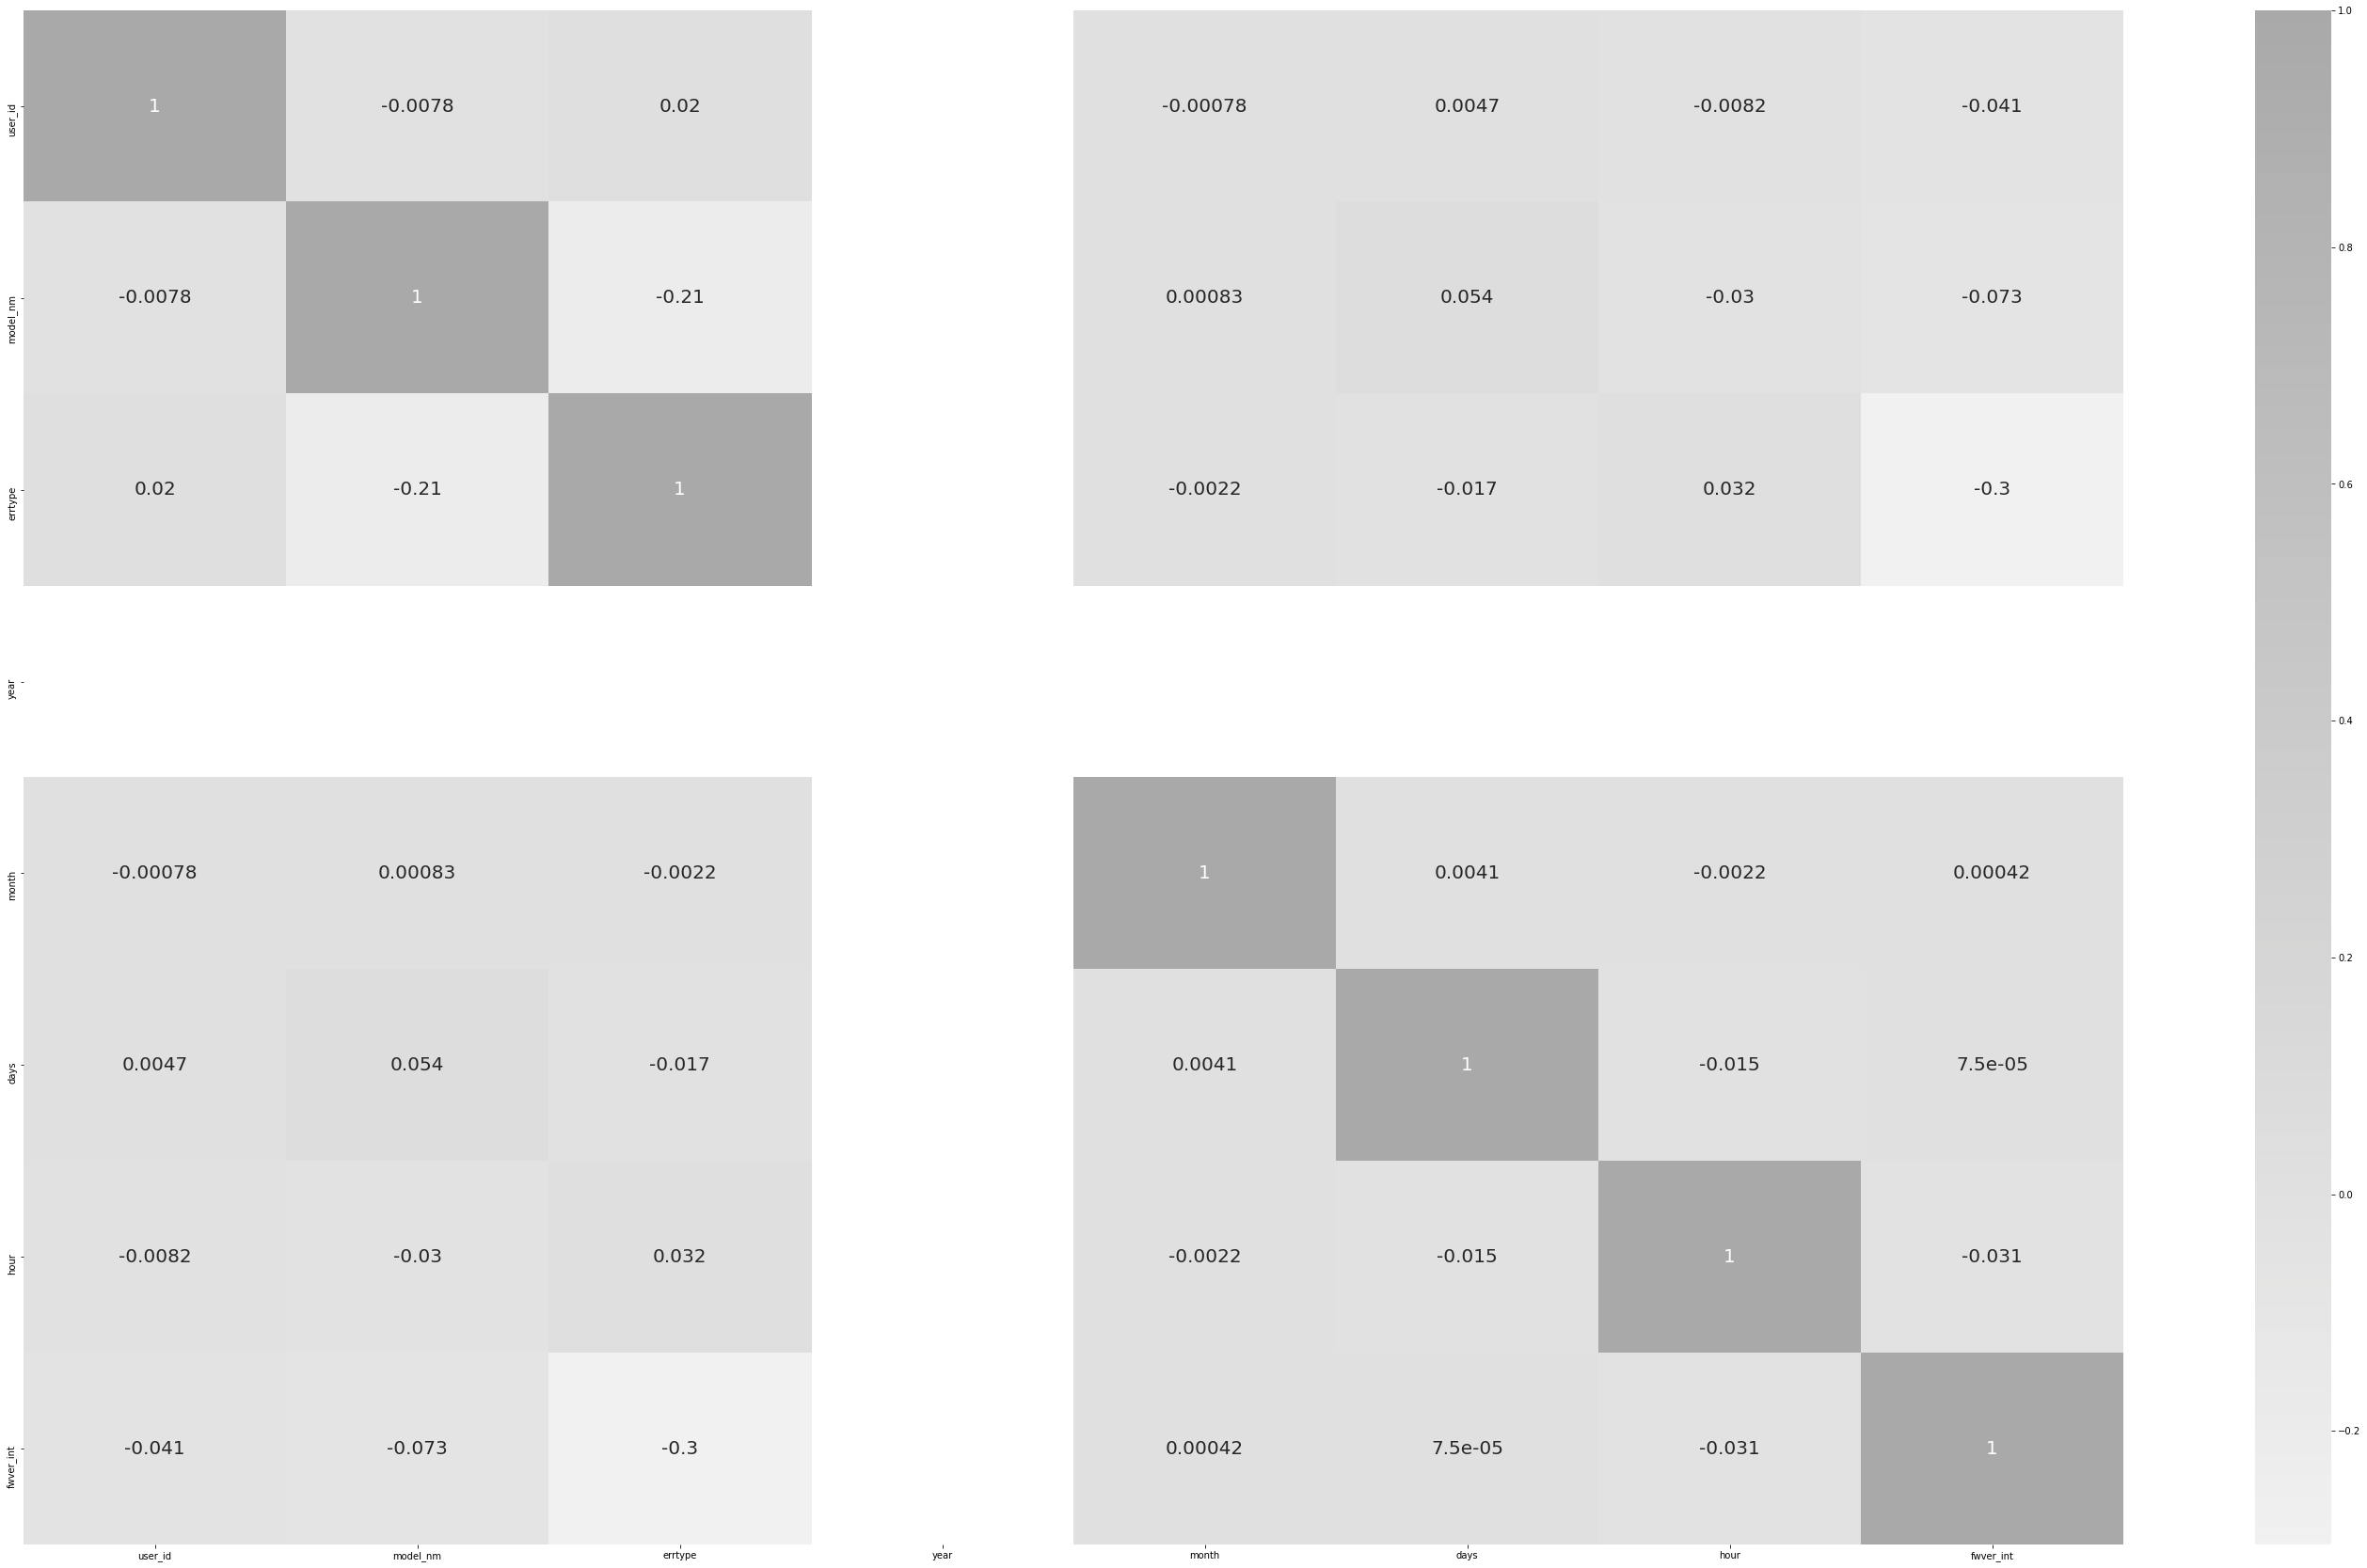

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 30))
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(x_data.corr(), annot=True, cmap=cmap, annot_kws={"size": 20})
plt.show()

In [ ]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm

#  다중 선형회귀분석
x_data = train_err.drop(columns = 'prob') #변수 여러개
target = train_err[["prob"]]

# for b0, 상수항 추가
# x_data = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(target.astype(float), x_data.astype(float))
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prob   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                 3.568e+04
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:50:23   Log-Likelihood:            -1.1834e+07
No. Observations:            16554663   AIC:                         2.367e+07
Df Residuals:                16554655   BIC:                         2.367e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
user_id     1.597e-06    2.8e-08     56.980      0.000    1.54e-06    1.65e-06
model_nm      -0.0235   9.63e-05   -244.209      0.000      -0.024      -0.023
errtype        0.0016   1.32e-05    119.455      0.000       0.002       0.002
year          -0.0001      0.000     -0.491      0.623      -0.001       0.000
month          0.0983      0.053      1.844      0.065      -0.006       0.203
days          -0.0008   1.41e-05    -57.617      0.000      -0.001      -0.001
hour           0.0018   1.75e-05    103.592      0.000       0.002       0.002
fwver_int  -8.752e-08   2.73e-10   -321.035      0.000   -8.81e-08    -8.7e-08
==============================================================================
Omnibus:                 59328394.547   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2603376.719
Skew:                           0.158   Prob(JB):                         0.00
Kurtosis:                       1.083   Cond. No.                     1.87e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm

# 다중 선형회귀분석
x_data_2 = train_err.drop(columns = ['prob','year'])#변수 여러개
target = train_err[["prob"]]

# for b0, 상수항 추가
# x_data = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model_2 = sm.OLS(target.astype(float), x_data_2.astype(float))
fitted_multi_model_2 = multi_model_2.fit()
fitted_multi_model_2.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prob   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                 4.163e+04
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:55:17   Log-Likelihood:            -1.1834e+07
No. Observations:            16554663   AIC:                         2.367e+07
Df Residuals:                16554656   BIC:                         2.367e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
user_id     1.597e-06    2.8e-08     56.979      0.000    1.54e-06    1.65e-06
model_nm      -0.0235   9.63e-05   -244.209      0.000      -0.024      -0.023
errtype        0.0016   1.32e-05    119.454      0.000       0.002       0.002
month          0.0721      0.000    545.785      0.000       0.072       0.072
days          -0.0008   1.41e-05    -57.615      0.000      -0.001      -0.001
hour           0.0018   1.75e-05    103.591      0.000       0.002       0.002
fwver_int  -8.752e-08   2.73e-10   -321.037      0.000   -8.81e-08    -8.7e-08
==============================================================================
Omnibus:                 59328383.908   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2603377.430
Skew:                           0.158   Prob(JB):                         0.00
Kurtosis:                       1.083   Cond. No.                     4.80e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import matplotlib.pyplot as plt

fitted_multi_model_2.resid.plot(label = "7 model")

plt.legend()

/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_data = train_err.drop(columns = 'prob').astype(float)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


VIF Factor   features
0    1.001962    user_id
1    1.074141   model_nm
2    1.167360    errtype
3    0.000000       year
4    1.000026      month
5    1.003211       days
6    1.002554       hour
7    1.122003  fwver_int

In [ ]:
import statsmodels.api as sm

target = train_err[['prob']]

model_vif = sm.OLS(target, x_data)
fitted_model_vif = model_vif.fit()

fitted_model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prob   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                 3.568e+04
Date:                Tue, 12 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:05:32   Log-Likelihood:            -1.1834e+07
No. Observations:            16554663   AIC:                         2.367e+07
Df Residuals:                16554655   BIC:                         2.367e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
user_id     1.597e-06    2.8e-08     56.980      0.000    1.54e-06    1.65e-06
model_nm      -0.0235   9.63e-05   -244.209      0.000      -0.024      -0.023
errtype        0.0016   1.32e-05    119.455      0.000       0.002       0.002
year          -0.0001      0.000     -0.491      0.623      -0.001       0.000
month          0.0983      0.053      1.844      0.065      -0.006       0.203
days          -0.0008   1.41e-05    -57.617      0.000      -0.001      -0.001
hour           0.0018   1.75e-05    103.592      0.000       0.002       0.002
fwver_int  -8.752e-08   2.73e-10   -321.035      0.000   -8.81e-08    -8.7e-08
==============================================================================
Omnibus:                 59328394.547   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2603376.719
Skew:                           0.158   Prob(JB):                         0.00
Kurtosis:                       1.083   Cond. No.                     1.87e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


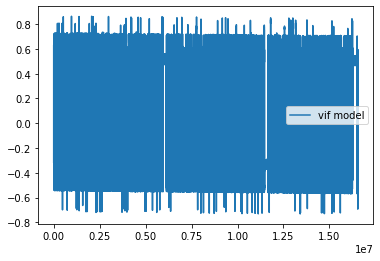

In [ ]:
import matplotlib.pyplot as plt

fitted_model_vif.resid.plot(label = "vif model")

plt.legend()